In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.shape

(112, 2)

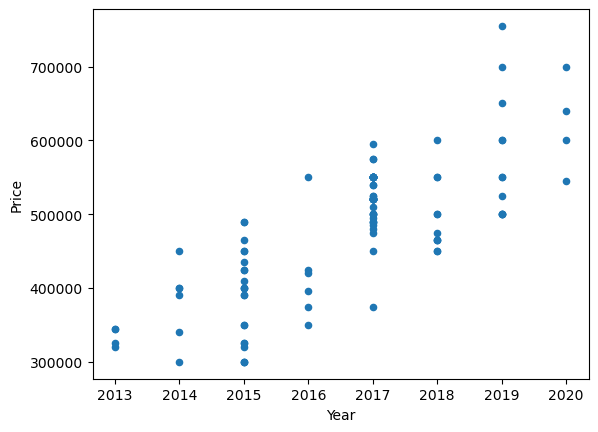

In [7]:
data.plot.scatter(x='Year',y='Price')
plt.show()

In [8]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

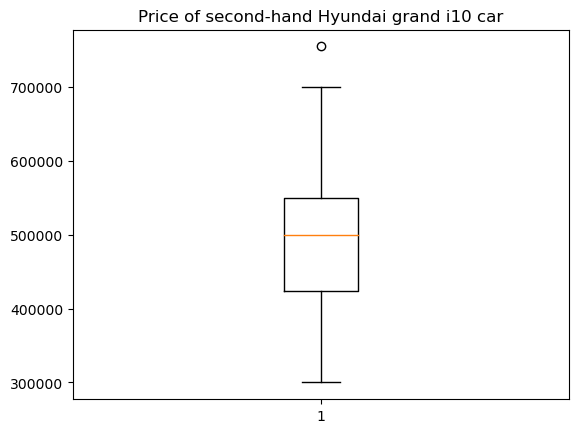

In [9]:
plt.boxplot(data['Price'])
plt.title('Price of second-hand Hyundai grand i10 car')
plt.show()

In [10]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

422500.0 500000.0 550000.0


C:\Users\amani\AppData\Local\Temp\ipykernel_25704\70395549.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Price'],25,interpolation='midpoint')
C:\Users\amani\AppData\Local\Temp\ipykernel_25704\70395549.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Price'],50,interpolation='midpoint')
C:\Users\amani\AppData\Local\Temp\ipykernel_25704\70395549.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [11]:
data['Price'].median()

500000.0

In [12]:
iqr=Q3-Q1
iqr

127500.0

In [13]:
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

231250.0 741250.0


In [14]:
outliers1=[]
for i in data['Price']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)
outliers1

[755000]

In [15]:
ind2=data['Price']>up_limit
data.loc[ind2].index

Int64Index([1], dtype='int64')

<AxesSubplot: >

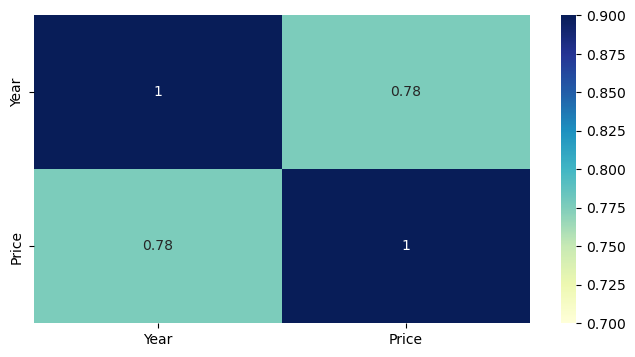

In [16]:
corrmatrix = data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, vmin = .7, vmax =.9, annot=True, cmap='YlGnBu')

In [17]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [18]:
y = data['Price']
X = data.drop(['Price'],axis =1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(X_train,y_train)
predictions = model1.predict(X_test)

In [23]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [24]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  4326906256.829671
The r squared value is:  0.36759313425902185


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)
lin_reg = LinearRegression()
model2 = lin_reg.fit(X_train,y_train)
predictions = model2.predict(X_test)
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  3878767151.073449
The r squared value is:  0.4347961632108023


In [28]:
data = pd.read_csv(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_age_price.csv')

In [29]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [30]:
from sklearn.linear_model import Lasso

In [31]:
# define model
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [32]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 63.59
R squared test set 43.48


In [33]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 3165745272.08
MSE test set 3878735896.22


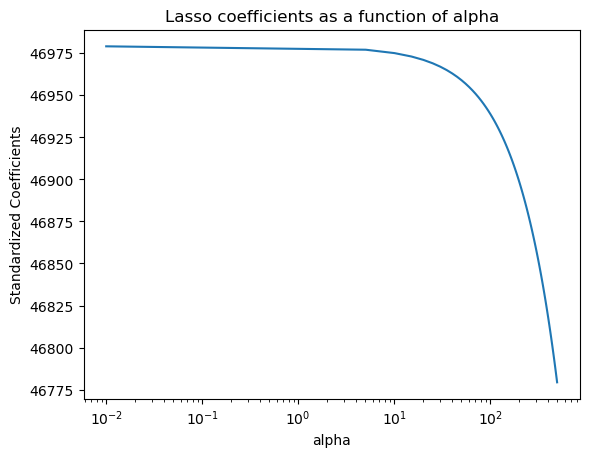

In [34]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [35]:
print('slope:%.2f' % lasso.coef_[0])

slope:46779.41


In [36]:
print('Intercepts:%.2f'%lasso.intercept_)

Intercepts:-93848891.09


In [37]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=100)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=100, random_state=0)

In [38]:
model.alpha_

117.68056944444444

In [39]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=117.68056944444444)

In [40]:
print(list(zip(lasso_best.coef_, X)))

[(46932.036430099004, 'Year')]


In [41]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 63.59
R squared test set 43.53


In [42]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error:',mean_squared_error(y_test,pred))
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,pred)))
print('the r squared value is',r2_score(y_test,pred))

mean_squared_error: 3878735896.222091
RMSE value is: 62279.49820143135
the r squared value is 0.4348007175862566


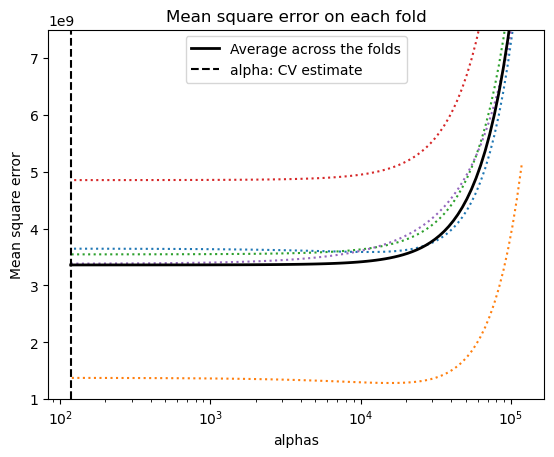

In [43]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 1000000000, 7500000000
plt.ylim(ymin, ymax);

In [44]:
4326906256.829671
.222091

3878735896.222091

### The MSE values is obtained as 4326906256 for Linear and 3878735896 for lasso models.The R squared values are 0.36759 in linear & 0.434796 in lasso. The Lasso model is giving the slightly lesser error values than Linear Regession models.So lasso regression model is performing slightly better than linear regression model in this case.The data set taken is a smaller one. Working in a bigger data set will give better idea about both models.